# 6th Semseter Project

## Predicting next day price in stock market
---
## Team 8


*   Ariyawansha P.H.J.U. - E/18/028
*   Kasthuripitiya K.A.I.M. - E/18/173
*   Ranasinghe S.M.T.S.C. - E/18/285



## Note:
### This is new model which is going to use in web application

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# Importing other librarires
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [ ]:
# !pip freeze

## EDA

In [4]:
# Data preprocessing and staging
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/6SP/Datatsets/AAPL.csv")

data.head()

,date,time,open,high,low,close,trade_count,vwap
0,2021-06-21,04:00:00,128.79,130.88,127.71,130.77,504521,129.97
1,2021-06-22,04:00:00,130.60,132.53,130.09,132.43,479622,131.55
2,2021-06-23,04:00:00,132.22,132.76,131.69,132.15,423328,132.24
3,2021-06-24,04:00:00,132.89,133.08,131.39,131.86,442356,132.22
4,2021-06-25,04:00:00,131.91,132.34,131.27,131.57,357312,131.69


In [5]:
# Check for the null values
data.isna().sum()

date           0
time           0
open           0
high           0
low            0
close          0
trade_count    0
vwap           0
dtype: int64

In [6]:
data.isnull().sum()

date           0
time           0
open           0
high           0
low            0
close          0
trade_count    0
vwap           0
dtype: int64

In [7]:
# Check for duplicates
data.duplicated().sum()

0

In [8]:
# Add next day price column

data['next'] = data['open'].shift(-1)
data.shape

(504, 9)

In [9]:
# Test for null values
data.isna().sum()

date           0
time           0
open           0
high           0
low            0
close          0
trade_count    0
vwap           0
next           1
dtype: int64

In [10]:
# Drop the row
data.dropna(axis=0)

,date,time,open,high,low,close,trade_count,vwap,next
0,2021-06-21,04:00:00,128.7900,130.88,127.71,130.77,504521,129.970000,130.6000
1,2021-06-22,04:00:00,130.6000,132.53,130.09,132.43,479622,131.550000,132.2200
2,2021-06-23,04:00:00,132.2200,132.76,131.69,132.15,423328,132.240000,132.8900
3,2021-06-24,04:00:00,132.8900,133.08,131.39,131.86,442356,132.220000,131.9100
4,2021-06-25,04:00:00,131.9100,132.34,131.27,131.57,357312,131.690000,131.8600
...,...,...,...,...,...,...,...,...,...
498,2023-06-13,04:00:00,182.8000,184.15,182.44,183.31,609651,183.170628,183.4099
499,2023-06-14,04:00:00,183.4099,184.39,182.02,183.95,615212,183.710264,183.9600
500,2023-06-15,04:00:00,183.9600,186.52,183.78,186.01,696975,185.567231,186.7300
501,2023-06-16,04:00:00,186.7300,186.99,184.66,185.02,605936,185.645946,184.4100


In [11]:
data.isna().sum()
data.dropna(axis=0, inplace=True)

In [12]:
# Viewing the next day column
data = data.drop(['date', 'time'], axis=1)
data.head()

,open,high,low,close,trade_count,vwap,next
0,128.79,130.88,127.71,130.77,504521,129.97,130.60
1,130.60,132.53,130.09,132.43,479622,131.55,132.22
2,132.22,132.76,131.69,132.15,423328,132.24,132.89
3,132.89,133.08,131.39,131.86,442356,132.22,131.91
4,131.91,132.34,131.27,131.57,357312,131.69,131.86


In [13]:
data = data.drop(['trade_count', 'vwap'], axis=1)
data.head()

,open,high,low,close,next
0,128.79,130.88,127.71,130.77,130.60
1,130.60,132.53,130.09,132.43,132.22
2,132.22,132.76,131.69,132.15,132.89
3,132.89,133.08,131.39,131.86,131.91
4,131.91,132.34,131.27,131.57,131.86


In [14]:
# Get the X and Y set
X = data.drop(['next'], axis=1)
y = data['next']

# Test train data split
# Importing libraries
from sklearn.model_selection import train_test_split

# Train test splitting using 80% of training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Buliding the neural Network

In [15]:
# Import math
import math

# All the settings below are set almost the maximum accuracy
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,), name="Num_input"),
    tf.keras.layers.BatchNormalization(axis= -1, name='Num_normalization'),
    tf.keras.layers.Dense(128, name='dense_1_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(64, name='dense_2_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(16, name='dense_3_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(8, name='dense_4_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(1, name='output'),
])

# Chosing optimizer and loss function
# Loss function
loss_function = tf.keras.losses.MeanSquaredError()

# Select optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, clipvalue=1)

# Compling
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

# Batch size and epoch size determination
BATCH_SIZE = 32

# Fitting the model
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=15, steps_per_epoch=math.ceil(X_train.shape[0]/BATCH_SIZE))

Epoch 1/15
13/13 [==============================] - 11s 9ms/step - loss: 20616.3242 - mae: 142.3713
Epoch 2/15
13/13 [==============================] - 0s 9ms/step - loss: 9208.6953 - mae: 76.4881
Epoch 3/15
13/13 [==============================] - 0s 8ms/step - loss: 4721.4370 - mae: 59.1641
Epoch 4/15
13/13 [==============================] - 0s 7ms/step - loss: 2857.5430 - mae: 45.8464
Epoch 5/15
13/13 [==============================] - 0s 5ms/step - loss: 570.6672 - mae: 17.7761
Epoch 6/15
13/13 [==============================] - 0s 4ms/step - loss: 68.2182 - mae: 6.2969
Epoch 7/15
13/13 [==============================] - 0s 4ms/step - loss: 104.2919 - mae: 8.3807
Epoch 8/15
13/13 [==============================] - 0s 4ms/step - loss: 54.8444 - mae: 5.8442
Epoch 9/15
13/13 [==============================] - 0s 5ms/step - loss: 42.5085 - mae: 5.4140
Epoch 10/15
13/13 [==============================] - 0s 4ms/step - loss: 116.6356 - mae: 9.1072
Epoch 11/15
13/13 [=====================

In [24]:
!pip install scikeras

In [21]:
def create_model():
  # All the settings below are set almost the maximum accuracy
# Creating the model
  model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(4,), name="Num_input"),
      tf.keras.layers.BatchNormalization(axis= -1, name='Num_normalization'),
      tf.keras.layers.Dense(128, name='dense_1_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(64, name='dense_2_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(16, name='dense_3_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(8, name='dense_4_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(1, name='output'),
  ])

  # Chosing optimizer and loss function
  # Loss function
  loss_function = tf.keras.losses.MeanSquaredError()

  # Select optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, clipvalue=1)

  # Compling
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

  return model

In [38]:
# Done cross validation
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = tf.keras.Sequential([
      tf.keras.layers.InputLayer(input_shape=(4,), name="Num_input"),
      tf.keras.layers.BatchNormalization(axis= -1, name='Num_normalization'),
      tf.keras.layers.Dense(128, name='dense_1_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(64, name='dense_2_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(16, name='dense_3_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(8, name='dense_4_num', activation=tf.nn.relu),
      tf.keras.layers.Dense(1, name='output'),
  ])

# Chosing optimizer and loss function
# Loss function
loss_function = tf.keras.losses.MeanSquaredError()

# Select optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, clipvalue=1)

# Compling
model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])
estimator = KerasRegressor(model=create_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)

results = cross_val_score(estimator, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -65.20 (71.09) MSE


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Num_normalization (BatchNo  (None, 4)                 16        
 rmalization)                                                    
                                                                 
 dense_1_num (Dense)         (None, 128)               640       
                                                                 
 dense_2_num (Dense)         (None, 64)                8256      
                                                                 
 dense_3_num (Dense)         (None, 16)                1040      
                                                                 
 dense_4_num (Dense)         (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                        

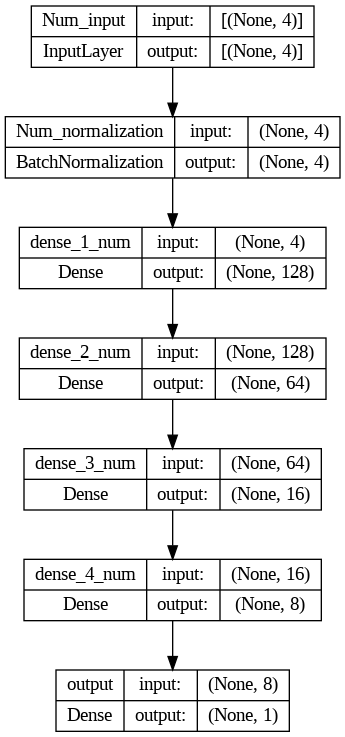

In [ ]:
# plot the model
from keras.utils import plot_model

# plotting
plot_model(model, show_shapes=True, show_layer_names=True)

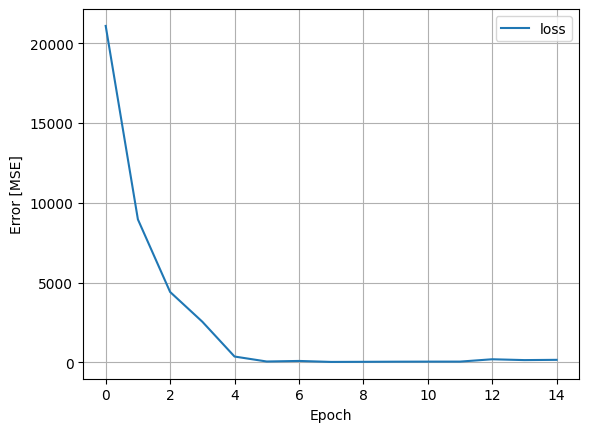

In [ ]:
# Import matplotliib
import matplotlib.pyplot as plt


# Plot the error
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

## Saving model and data of normalization layer

In [ ]:
model.save("AAPL.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model("AAPL.h5")

##Predicting using the model

In [ ]:
# Predictions
# model = pickle.load(open('AAPL.pkl', 'rb'))

x = pd.read_csv('/content/drive/MyDrive/6SP/Datatsets/AAPL.csv').drop(['date', 'time'], axis=1)
x.shape
x = pd.DataFrame([(148.3, 148.8, 146.31, 146.86)], columns= ['open', 'high', 'low', 'close'])
y_pred = new_model.predict(x);

print(np.array(y_pred))


1/1 [==============================] - 0s 103ms/step
[[174.42793]]


## This codes are for importing models

In [ ]:
# Importing model with given names
# Save model
import pickle

# Import the model
pickle.dump(model, open('/content/drive/MyDrive/6SP/Models/AAPL.pkl', 'wb'))

# Add function to data preprocessing, Model creation and dumping and plotting

Below function is using for preprocess data

In [ ]:
# Function for preprocessing

def preprocess(name):

  # Load the
  # create the file name
  filename = '/content/drive/MyDrive/6SP/Datatsets/' + name + '.csv'
  # loading and reading the dataset
  data = pd.read_csv(filename)

  # Then data pre-processing
  # Drop the missing values
  data.dropna(axis=0, inplace=True)
  # Drop duplicates
  data.drop_duplicates(keep='first')

  # Shifting the data for next day open. close, high, low values
  data['next-open'] = data['open'].shift(-1)
  data['next-close'] = data['close'].shift(-1)
  data['next-high'] = data['high'].shift(-1)
  data['next-low'] = data['low'].shift(-1)

  # then again drop the rows with Null values of NaN
  data.dropna(axis=0, inplace=True)

  # Return the dataframe
  return data


Then the data is going to into the training and test data set and then train the model

In [ ]:
def model_func(data , name):
  # Columns that should not be in attributes
  y_columns = ['next-open', 'next-close', 'next-high', 'next-low']

  # Drop the date and time
  data = data.drop(['date', 'time', 'trade_count', 'vwap'], axis=1)

  #  Preparing X and Y data sets
  X = data.drop(y_columns, axis=1)
  Y = data['next-open']

  # Creating the Neural Network
  model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4,), name="Num_input"),
    tf.keras.layers.BatchNormalization(axis= -1, name='Num_normalization'),
    tf.keras.layers.Dense(128, name='dense_1_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(64, name='dense_2_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(16, name='dense_3_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(8, name='dense_4_num', activation=tf.nn.relu),
    tf.keras.layers.Dense(1, name='output'),
  ])

  # Chosing optimizer and loss function
  # Loss function
  loss_function = tf.keras.losses.MeanSquaredError()

  # Select optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, clipvalue=1)

  # Compling
  model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

  # Batch size and epoch size determination
  BATCH_SIZE = 32

  # Fitting the model
  history = model.fit(X, Y, batch_size=BATCH_SIZE, epochs=15, steps_per_epoch=math.ceil(X.shape[0]/BATCH_SIZE))

  # Model name
  model_name = '/content/drive/MyDrive/6SP/Models/' + name + '.h5'

  # Import the model
  # pickle.dump(model, open(model_name, 'wb'))
  model.save(model_name)

  # Get the model history for plotting and analysing
  return history

Method for plotting accuracy (Mean Squarred Error) with the epoch size. Epoch size, batch size is seleceted for minimum MSE.

In [ ]:
# Plot the error
def plot_loss(history, name):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)

  # Plot name
  plot_name = '/content/drive/MyDrive/6SP/Plots/' + name+ '.png'
  # Saving the figure
  plt.savefig(plot_name)

## Using above Function to train models

In [ ]:
# Assign company names
company_names = ['AAPL', 'CSCO', 'FDX', 'GD', 'GOOG', 'LIN', 'MSFT', 'NVDA', 'RTX', 'TSLA']

# Iteration over companies and plotting and get th models
for i in range(len(company_names)):

  # Get the data
  data = preprocess(company_names[i])
  # Get the history after training
  history = model_func(data, company_names[i])
  # Plottig
  # plot_loss(history, company_names[i])

Epoch 1/15
16/16 [==============================] - 2s 5ms/step - loss: 15385.9561 - mae: 113.3243
Epoch 2/15
16/16 [==============================] - 0s 4ms/step - loss: 8579.8496 - mae: 71.8499
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 3038.4902 - mae: 46.6316
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 760.5745 - mae: 20.9347
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 144.4579 - mae: 9.2693
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 129.8991 - mae: 9.3044
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 69.2836 - mae: 6.4970
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 88.0600 - mae: 7.2479
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 108.2826 - mae: 8.0818
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 220.7868 - mae: 12.0932
Epoch 11/15
16/16 [======================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 2s 5ms/step - loss: 1660.9603 - mae: 35.6948
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 621.7427 - mae: 21.4701
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 176.0706 - mae: 10.2778
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 14.7576 - mae: 3.1862
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 5.1146 - mae: 1.8231
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 5.5534 - mae: 1.8437
Epoch 7/15
16/16 [==============================] - 0s 6ms/step - loss: 8.6112 - mae: 2.4182
Epoch 8/15
16/16 [==============================] - 0s 6ms/step - loss: 6.8827 - mae: 2.1146
Epoch 9/15
16/16 [==============================] - 0s 6ms/step - loss: 7.0890 - mae: 2.1385
Epoch 10/15
16/16 [==============================] - 0s 6ms/step - loss: 9.7509 - mae: 2.4711
Epoch 11/15
16/16 [==============================] - 0s 6m

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 2s 4ms/step - loss: 38277.4922 - mae: 188.9596
Epoch 2/15
16/16 [==============================] - 0s 4ms/step - loss: 18978.2559 - mae: 107.4912
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 7000.0713 - mae: 72.2849
Epoch 4/15
16/16 [==============================] - 0s 4ms/step - loss: 732.6283 - mae: 21.6665
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 236.8842 - mae: 11.0921
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 143.5961 - mae: 9.0797
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 176.4157 - mae: 10.0619
Epoch 8/15
16/16 [==============================] - 0s 5ms/step - loss: 127.4607 - mae: 9.0490
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 127.1678 - mae: 8.6864
Epoch 10/15
16/16 [==============================] - 0s 5ms/step - loss: 170.6615 - mae: 11.0107
Epoch 11/15
16/16 [================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 2s 5ms/step - loss: 35701.3047 - mae: 182.4453
Epoch 2/15
16/16 [==============================] - 0s 4ms/step - loss: 14251.0967 - mae: 95.9465
Epoch 3/15
16/16 [==============================] - 0s 4ms/step - loss: 6069.3970 - mae: 66.1674
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 847.5870 - mae: 20.3346
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 97.3554 - mae: 7.7912
Epoch 6/15
16/16 [==============================] - 0s 4ms/step - loss: 71.8850 - mae: 6.6819
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 134.1291 - mae: 9.3244
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 325.9265 - mae: 15.3817
Epoch 9/15
16/16 [==============================] - 0s 4ms/step - loss: 70.9453 - mae: 6.8073
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 214.2442 - mae: 12.0998
Epoch 11/15
16/16 [=====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 4s 9ms/step - loss: 12099.8320 - mae: 106.2786
Epoch 2/15
16/16 [==============================] - 0s 9ms/step - loss: 4560.5283 - mae: 54.7657
Epoch 3/15
16/16 [==============================] - 0s 8ms/step - loss: 1871.8280 - mae: 36.2202
Epoch 4/15
16/16 [==============================] - 0s 8ms/step - loss: 477.0505 - mae: 17.8719
Epoch 5/15
16/16 [==============================] - 0s 9ms/step - loss: 39.0740 - mae: 4.9498
Epoch 6/15
16/16 [==============================] - 0s 8ms/step - loss: 60.1011 - mae: 6.5255
Epoch 7/15
16/16 [==============================] - 0s 7ms/step - loss: 59.0126 - mae: 6.2215
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 40.7038 - mae: 5.1643
Epoch 9/15
16/16 [==============================] - 0s 7ms/step - loss: 80.0624 - mae: 7.3775
Epoch 10/15
16/16 [==============================] - 0s 7ms/step - loss: 41.8198 - mae: 5.1366
Epoch 11/15
16/16 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 2s 5ms/step - loss: 70225.9062 - mae: 252.5996
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 37858.8906 - mae: 159.6485
Epoch 3/15
16/16 [==============================] - 0s 5ms/step - loss: 14051.7861 - mae: 101.1926
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 1358.0631 - mae: 25.4440
Epoch 5/15
16/16 [==============================] - 0s 4ms/step - loss: 273.4994 - mae: 13.2908
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 192.5721 - mae: 10.3640
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 230.0418 - mae: 11.5643
Epoch 8/15
16/16 [==============================] - 0s 4ms/step - loss: 260.9073 - mae: 12.6423
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 253.8910 - mae: 12.9959
Epoch 10/15
16/16 [==============================] - 0s 5ms/step - loss: 294.3481 - mae: 13.5919
Epoch 11/15
16/16 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 3s 7ms/step - loss: 75288.9062 - mae: 272.6472
Epoch 2/15
16/16 [==============================] - 0s 7ms/step - loss: 34218.5781 - mae: 164.7194
Epoch 3/15
16/16 [==============================] - 0s 11ms/step - loss: 20530.5918 - mae: 119.7861
Epoch 4/15
16/16 [==============================] - 0s 10ms/step - loss: 9124.6162 - mae: 83.4412
Epoch 5/15
16/16 [==============================] - 0s 10ms/step - loss: 1416.6805 - mae: 28.6313
Epoch 6/15
16/16 [==============================] - 0s 10ms/step - loss: 635.4088 - mae: 19.1740
Epoch 7/15
16/16 [==============================] - 0s 9ms/step - loss: 447.9649 - mae: 16.9164
Epoch 8/15
16/16 [==============================] - 0s 9ms/step - loss: 313.8190 - mae: 14.2628
Epoch 9/15
16/16 [==============================] - 0s 10ms/step - loss: 255.6996 - mae: 13.0386
Epoch 10/15
16/16 [==============================] - 0s 7ms/step - loss: 221.1766 - mae: 11.9240
Epoch 11/15
16/16 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 3s 6ms/step - loss: 45164.5664 - mae: 201.8395
Epoch 2/15
16/16 [==============================] - 0s 8ms/step - loss: 20799.8008 - mae: 115.5642
Epoch 3/15
16/16 [==============================] - 0s 8ms/step - loss: 8997.4912 - mae: 80.6677
Epoch 4/15
16/16 [==============================] - 0s 6ms/step - loss: 2158.6404 - mae: 38.1060
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 554.7490 - mae: 17.1732
Epoch 6/15
16/16 [==============================] - 0s 8ms/step - loss: 932.3016 - mae: 20.5648
Epoch 7/15
16/16 [==============================] - 0s 10ms/step - loss: 1414.6769 - mae: 29.4510
Epoch 8/15
16/16 [==============================] - 0s 8ms/step - loss: 633.3172 - mae: 20.5785
Epoch 9/15
16/16 [==============================] - 0s 4ms/step - loss: 893.2756 - mae: 24.0396
Epoch 10/15
16/16 [==============================] - 0s 4ms/step - loss: 479.0915 - mae: 17.8909
Epoch 11/15
16/16 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 4s 6ms/step - loss: 5418.6245 - mae: 67.8732
Epoch 2/15
16/16 [==============================] - 0s 6ms/step - loss: 2772.2341 - mae: 41.7236
Epoch 3/15
16/16 [==============================] - 0s 7ms/step - loss: 780.8931 - mae: 23.2730
Epoch 4/15
16/16 [==============================] - 0s 6ms/step - loss: 113.7334 - mae: 7.8198
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 14.7221 - mae: 3.0712
Epoch 6/15
16/16 [==============================] - 0s 7ms/step - loss: 19.9013 - mae: 3.7350
Epoch 7/15
16/16 [==============================] - 0s 6ms/step - loss: 16.9319 - mae: 3.3613
Epoch 8/15
16/16 [==============================] - 0s 6ms/step - loss: 10.3329 - mae: 2.4433
Epoch 9/15
16/16 [==============================] - 0s 7ms/step - loss: 15.4340 - mae: 3.2301
Epoch 10/15
16/16 [==============================] - 0s 6ms/step - loss: 10.6970 - mae: 2.6043
Epoch 11/15
16/16 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/15
16/16 [==============================] - 3s 5ms/step - loss: 60759.8984 - mae: 237.9016
Epoch 2/15
16/16 [==============================] - 0s 6ms/step - loss: 32684.6992 - mae: 147.1436
Epoch 3/15
16/16 [==============================] - 0s 6ms/step - loss: 14916.9434 - mae: 105.2350
Epoch 4/15
16/16 [==============================] - 0s 7ms/step - loss: 7761.1401 - mae: 74.4229
Epoch 5/15
16/16 [==============================] - 0s 7ms/step - loss: 1282.1523 - mae: 26.9585
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 581.7417 - mae: 18.5814
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 392.7338 - mae: 15.8832
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 524.7098 - mae: 17.3677
Epoch 9/15
16/16 [==============================] - 0s 8ms/step - loss: 538.0129 - mae: 18.4487
Epoch 10/15
16/16 [==============================] - 0s 5ms/step - loss: 288.8376 - mae: 12.9668
Epoch 11/15
16/16 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Function to get preiction

In [ ]:
# Defining function to get model name and outputs

# Importing pickel
# import pickle
from tensorflow.keras.models import load_model

# Model input class
class Predict:

  def __init__ (self, open, close, high, low, name):
    self._open = float(open)
    self._close = float(close)
    self._high = float(high)
    self._low = float(low)
    self._name = name

  def getOpen(self):
    return self._open

  def getClose(self):
    return self._close

  def getHigh(self):
    return self._high

  def getLow(self):
    return self._low

  # Function for do predictions
  def predict_next_day_open_price(self):

      # Load the model
      try:
          # get the model name
          model_name =  f"/content/drive/MyDrive/6SP/Models/{self._name}.h5"

          # Open the model
          # model = pickle.load(open(model_name, 'rb')
          model = load_model(model_name)

          # Prediting
          x = pd.DataFrame([(self._open, self._high, self._low, self._close)],
                          columns= ['open', 'high', 'low', 'close'])
          prediction = model.predict(x)

          return prediction[0][0]

      except Exception as e:
          print(f"An error occurred: {str(e)}")

In [ ]:
obj = Predict(148.3, 146.86, 148.8, 146.31 , "AAPL")
print(obj.predict_next_day_open_price())

1/1 [==============================] - 0s 143ms/step
149.053


In [ ]:
model_test = pickle.load(open("/content/drive/MyDrive/6SP/Models/AAPL.pkl", 'rb'))
x = pd.DataFrame([(148.3, 148.8, 146.31, 146.86)], columns= ['open', 'high', 'low', 'close'])
prediction = model_test.predict(x)
print(prediction)

1/1 [==============================] - 0s 84ms/step
[[148.81914]]


In [ ]:
# get the model name
name = "AAPL"
model_name =  f"/content/drive/MyDrive/6SP/Models/{name}.pkl"

model = pickle.load(open(model_name, 'rb'))
x = pd.DataFrame([(148.3, 148.8, 146.31, 146.86)], columns= ['open', 'high', 'low', 'close'])

prediction = model.predict(x)
print(prediction)

1/1 [==============================] - 0s 211ms/step
[[148.81914]]
